Training score: 0.7881
Test score: 0.7880
F1-score: 0.6353
AUC Score: 0.8527

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2014
           1       0.73      0.56      0.64       986

    accuracy                           0.79      3000
   macro avg       0.77      0.73      0.74      3000
weighted avg       0.78      0.79      0.78      3000

AUC Score: 0.8527


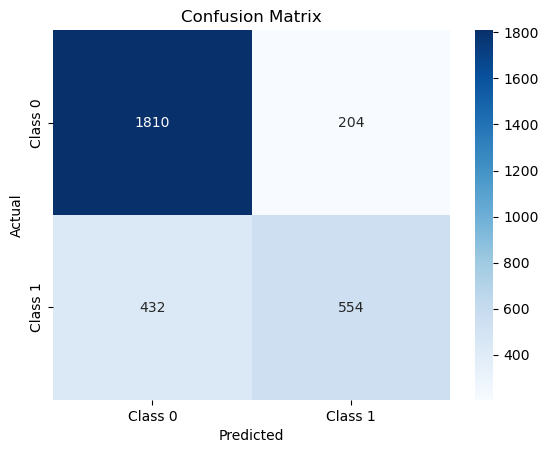

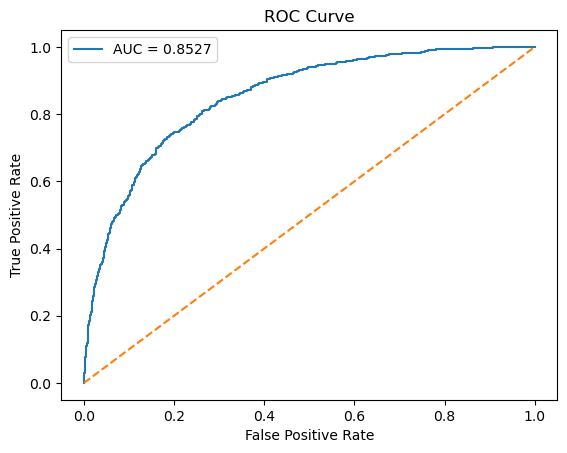

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score

data = pd.read_csv('diabetes (2).csv')  

X = data.drop(columns=['Diabetic'])
y = data['Diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))  
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Training score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")


y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]
# Obliczam F1-score i AUC dla Logistic Regression + Pipeline
f1_pipeline = f1_score(y_test, y_pred)
auc_pipeline = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1_pipeline:.4f}")
print(f"AUC Score: {auc_pipeline:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Wnioski: 🔹 Accuracy: 78.8% → To oznacza, że model klasyfikuje poprawnie prawie 8 na 10 przypadków.

🔹 F1-score dla klasy 1 (Diabetic): 0.64 → Model nieco gorzej wykrywa pacjentów chorych na cukrzycę (Recall = 0.56 oznacza, że prawie połowa przypadków cukrzycy jest pominięta).

🔹 Macierz pomyłek (Confusion Matrix):

Model dobrze klasyfikuje zdrowych pacjentów (81% Precision).
Cukrzycy są trudniejsi do wykrycia (Precision = 73%, ale Recall = 56%).

🔹 AUC = 0.8527 → To całkiem dobry wynik, co oznacza, że model dość dobrze róznicuje klasy.



Porównuje model z modelem z zadania 14.3 

                            Model  F1-score     AUC
0     Logistic Regression (L1/L2)    0.5809  0.8165
1  Logistic Regression + Pipeline    0.6353  0.8527


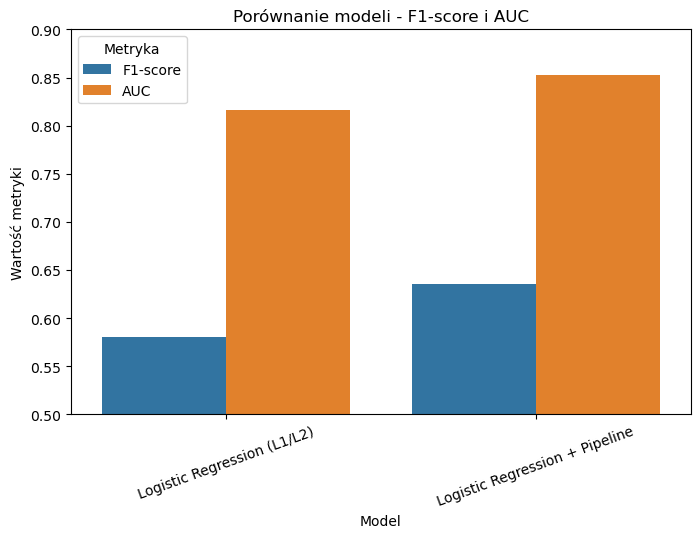

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zapisuje wyniki do zmiennych
f1_L1_L2 = 0.5809  
auc_L1_L2 = 0.8165

f1_pipeline = 0.6353 
auc_pipeline = 0.8527

# Tworze DataFrame z wynikami modeli przy użyciu zmiennych
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression (L1/L2)", "Logistic Regression + Pipeline"],
    "F1-score": [f1_L1_L2, f1_pipeline],  
    "AUC": [auc_L1_L2, auc_pipeline]      
})

# Wyświetlamy tabelę wyników
print(comparison_df)

# Wizualizacja wyników
plt.figure(figsize=(8,5))
sns.barplot(data=comparison_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Porównanie modeli - F1-score i AUC")
plt.xlabel("Model")
plt.ylabel("Wartość metryki")
plt.ylim(0.5, 0.9)  # Ustawienie skali dla czytelności
plt.legend(title="Metryka")
plt.xticks(rotation=20)
plt.show()


Wnioski: Model, który wykorzystuje Pipeline, działa lepiej niż zwykła regresja logistyczna – skuteczniej wykrywa cukrzycę i lepiej rozróżnia zdrowych i chorych pacjentów. Dzięki odpowiedniemu przygotowaniu danych (skalowanie, PCA, kodowanie kategorii) uzyskano wyższy wynik F1-score (0.6353 vs. 0.5809) oraz lepszą zdolność rozróżniania klas (AUC: 0.8527 vs. 0.8165). 